In [44]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.config import Config

In [ ]:
df = pd.read_csv("./dataset/KSTAR_Disruption_ts_data.csv")

In [74]:
df_extend = pd.read_csv("./dataset/KSTAR_Disruption_ts_data_extend.csv")

In [ ]:
df_disrupt = pd.read_csv("./dataset/KSTAR_Disruption_Shot_List.csv", encoding = "euc-kr")

In [63]:
config = Config()
df[config.DEFAULT_0D_COLS].describe()

,\q95,\ipmhd,\kappa,\tritop,\tribot,\betap,\betan,\li,\WTOT_DLM03,\ne_inter01
count,162209.000000,162209.000000,162209.000000,162209.000000,162209.000000,162209.000000,162209.000000,162209.000000,157004.000000,156762.000000
mean,6.180254,-502736.592535,1.660534,0.374214,0.645031,1.138076,1.307191,1.426084,170.351617,5.687079
std,13.176609,101165.962627,0.166392,0.174847,0.242654,7.352577,5.137580,24.207936,165.675998,16.471526
min,0.353544,-981561.125000,0.733197,-0.631636,-0.702209,-1523.972778,-1231.031128,0.081532,-884.889832,-147.045563
25%,4.473763,-555050.250000,1.614300,0.278204,0.557425,0.743523,0.896452,0.951865,86.955021,2.085016
50%,5.167495,-490556.062500,1.705674,0.356362,0.735089,1.158235,1.427461,1.045377,172.015015,4.444994
75%,6.376876,-461266.906250,1.765383,0.444265,0.826086,1.679252,1.773190,1.263255,264.135788,7.704017
max,1973.444702,-90612.476562,2.196418,0.977277,0.997593,29.288258,20.521006,3990.430908,913.081360,158.136719


In [99]:
df_extend[config.DEFAULT_0D_COLS].describe()

,\q95,\ipmhd,\kappa,\tritop,\tribot,\betap,\betan,\li,\WTOT_DLM03,\ne_inter01
count,384222.000000,384222.000000,384222.000000,384222.000000,384222.000000,384222.000000,384222.000000,384222.000000,384222.000000,384222.000000
mean,5.416761,493457.243563,1.658859,0.359502,0.649516,1.128335,1.323952,1.113861,189.583887,8.040476
std,2.645876,122575.842464,0.154963,0.171254,0.235544,0.571841,0.657430,0.342583,123.593837,12.786798
min,-16.374122,14.590723,-0.048202,-0.969409,-1.254587,0.000000,0.000000,-8.796540,0.000000,0.000000
25%,4.461235,462857.516187,1.609032,0.267016,0.596596,0.692660,0.802653,0.958687,96.334417,2.453739
50%,5.117193,491120.542580,1.694742,0.344484,0.730692,1.121820,1.394756,1.058469,177.171692,4.576937
75%,5.929296,554900.040384,1.752754,0.433838,0.822524,1.520958,1.778921,1.261903,264.395036,7.864605
max,119.321524,981561.125000,2.525622,0.946824,1.784719,4.558985,7.466848,23.452430,912.314621,158.115233


In [76]:
df_extend[config.TS_AVG_COLS].describe()

,\TS_NE_CORE_AVG,\TS_NE_EDGE_AVG,\TS_TE_CORE_AVG,\TS_TE_EDGE_AVG
count,384222.000000,384222.000000,384222.000000,384222.000000
mean,1.660596,11.341168,1.763073,0.976633
std,1.798283,317.384019,0.902946,0.618894
min,-14.027820,-233.096622,-10.121358,-8.302827
25%,0.448130,0.348704,1.179235,0.493548
50%,1.460398,0.591299,1.724637,1.016331
75%,2.587427,1.106034,2.238724,1.398167
max,95.331563,22686.592346,19.120225,10.591555


In [78]:
df[df['\\WTOT_DLM03'] == df['\\WTOT_DLM03'].min()].shot

93050    18441
Name: shot, dtype: int64

In [79]:
df_extend[df_extend['\\WTOT_DLM03'] == df_extend['\\WTOT_DLM03'].min()].shot

264701    19154
Name: shot, dtype: int64

In [80]:
df[df['\\betap'] == df['\\betap'].min()].shot

126389    20682
Name: shot, dtype: int64

In [81]:
df_extend[df_extend['\\betap'] == df_extend['\\betap'].min()].shot

7244    13520
Name: shot, dtype: int64

In [102]:
# negative value removal
if '\\ipmhd' in config.DEFAULT_0D_COLS:
    df_extend['\\ipmhd'] = df_extend['\\ipmhd'].abs().values
    
if '\\betap' in config.DEFAULT_0D_COLS:
    df_extend['\\betap'] = df_extend['\\betap'].apply(lambda x : x if x > 0 else 0)

if '\\betan' in config.DEFAULT_0D_COLS:
    df_extend['\\betan'] = df_extend['\\betan'].apply(lambda x : x if x > 0 else 0)
    
if '\\WTOT_DLM03' in config.DEFAULT_0D_COLS:
    df_extend['\\WTOT_DLM03'] = df_extend['\\WTOT_DLM03'].apply(lambda x : x if x > 0 else 0)
    
if '\\ne_inter01' in config.DEFAULT_0D_COLS:
    df_extend['\\ne_inter01'] = df_extend['\\ne_inter01'].apply(lambda x : x if x > 0 else 0)
    
if '\\li' in config.DEFAULT_0D_COLS:
    df_extend['\\li'] = df_extend['\\li'].apply(lambda x : x if x > 0 else 0)

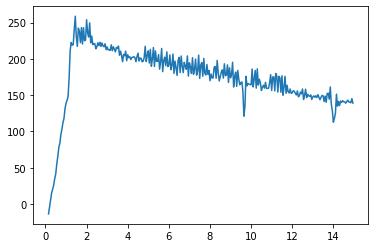

In [92]:
import matplotlib.pyplot as plt
plt.plot(df[df.shot == 14003]['time'], df[df.shot == 14003]['\\WTOT_DLM03'])

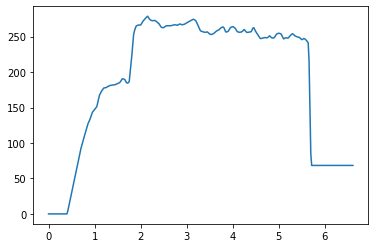

In [93]:
import matplotlib.pyplot as plt
plt.plot(df_extend[df_extend.shot == 19154]['time'], df_extend[df_extend.shot == 19154]['\\WTOT_DLM03'])

In [100]:
df_extend[df_extend['\\li'] == df_extend['\\li'].min()].shot

16786    13706
Name: shot, dtype: int64

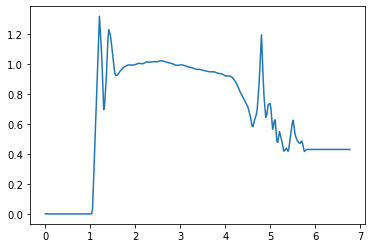

In [103]:
plt.plot(df_extend[df_extend.shot == 13706]['time'], df_extend[df_extend.shot == 13706]['\\li'])

In [94]:
np.unique(df_extend[df_extend['\\WTOT_DLM03'] < 0].shot)

array([], dtype=int64)

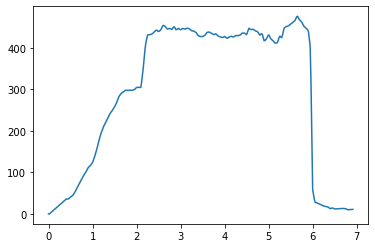

In [95]:
shot = 21650
plt.plot(df_extend[df_extend.shot == shot]['time'], df_extend[df_extend.shot == shot]['\\WTOT_DLM03'])

In [96]:
df[df.shot == 14003]['\\WTOT_DLM03']

14558    -13.450731
14559     -4.093238
14560      4.263850
14561     15.507334
14562     20.342239
            ...    
14850    140.656860
14851    140.368607
14852    139.525970
14853    145.202301
14854    139.120102
Name: \WTOT_DLM03, Length: 297, dtype: float64

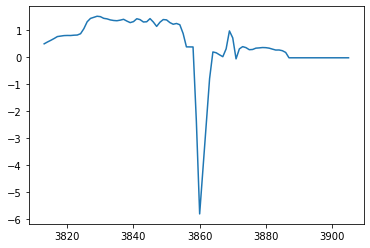

In [97]:
import matplotlib.pyplot as plt
plt.plot(df[df.shot == 13520]['\\betap'])

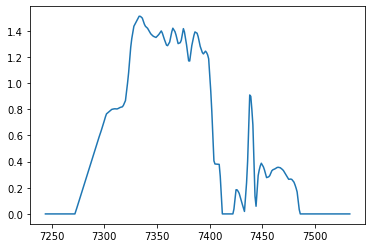

In [98]:
plt.plot(df_extend[df_extend.shot == 13520]['\\betap'])

In [3]:
shot_list = np.unique(df.shot.values).tolist()
shot = shot_list[-100]
df_shot = df[df.shot == shot]

In [4]:
df_shot

,time,shot,\q95,\ipmhd,\kappa,\tritop,\tribot,\betap,\betan,\li,...,\TS_EDGE11:EDGE11_NE,\TS_EDGE12:EDGE12_NE,\TS_EDGE13:EDGE13_NE,\TS_EDGE14:EDGE14_NE,\TS_EDGE15:EDGE15_NE,\TS_NE_CORE_AVG,\TS_NE_EDGE_AVG,\TS_TE_CORE_AVG,\TS_TE_EDGE_AVG,frame_idx
377466,0.000000,21230,7.572676,467387.964844,1.340801,-0.210000,-0.210000,-0.029966,-0.390041,0.642715,...,0.0,0.0,0.0,0.0,0.0,0.425084,0.635837,6.540309,0.498035,0
377467,0.019048,21230,7.502187,467387.964844,1.340801,-0.199630,-0.199630,0.000372,-0.343860,0.642715,...,0.0,0.0,0.0,0.0,0.0,0.418127,0.607872,6.398234,0.494540,4
377468,0.038095,21230,7.431697,467387.964844,1.340801,-0.189260,-0.189260,0.030710,-0.297678,0.642715,...,0.0,0.0,0.0,0.0,0.0,0.411171,0.579907,6.256160,0.491044,8
377469,0.057143,21230,7.361208,467387.964844,1.340801,-0.178891,-0.178891,0.061048,-0.251497,0.642715,...,0.0,0.0,0.0,0.0,0.0,0.404215,0.551942,6.114085,0.487548,12
377470,0.076190,21230,7.290718,467387.964844,1.340801,-0.168521,-0.168521,0.091386,-0.205315,0.642715,...,0.0,0.0,0.0,0.0,0.0,0.397258,0.523977,5.972010,0.484053,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377825,6.838095,21230,4.049520,480594.687500,1.780513,0.731087,0.011081,0.867326,1.115683,1.087158,...,0.0,0.0,0.0,0.0,0.0,0.650979,0.079700,2.269500,0.758642,1436
377826,6.857143,21230,4.049520,480594.687500,1.780513,0.731087,0.011081,0.867326,1.115683,1.087158,...,0.0,0.0,0.0,0.0,0.0,0.650979,0.079700,2.269500,0.758642,1440
377827,6.876190,21230,4.049520,480594.687500,1.780513,0.731087,0.011081,0.867326,1.115683,1.087158,...,0.0,0.0,0.0,0.0,0.0,0.650979,0.079700,2.269500,0.758642,1444
377828,6.895238,21230,4.049520,480594.687500,1.780513,0.731087,0.011081,0.867326,1.115683,1.087158,...,0.0,0.0,0.0,0.0,0.0,0.650979,0.079700,2.269500,0.758642,1448


In [5]:
kstar_shot_list = pd.read_csv('./dataset/KSTAR_Disruption_Shot_List.csv', encoding = "euc-kr")
video_shot_list = np.unique(kstar_shot_list.shot.values).tolist()

In [6]:
kstar_shot_list

tTQend = kstar_shot_list[kstar_shot_list.shot == shot].tTQend.values
tftsrt = kstar_shot_list[kstar_shot_list.shot == shot].tftsrt.values
tipminf = kstar_shot_list[kstar_shot_list.shot == shot].tipminf.values

In [7]:
print("numerical variables : ", len(shot_list))
print("video shot list : ", len(video_shot_list))

numerical variables :  923
video shot list :  1096


In [8]:
df_shot = df_shot.dropna(axis = 1)

In [9]:
t = df_shot.time
ip = df_shot['\\ipmhd']
kappa = df_shot['\\kappa']
betap = df_shot['\\betap']
betan = df_shot['\\betan']
li = df_shot['\\li']
Bc = df_shot['\\bcentr']
q95 = df_shot['\\q95']
tritop = df_shot['\\tritop']
tribot = df_shot['\\tribot']
W_tot = df_shot['\\WTOT_DLM03']

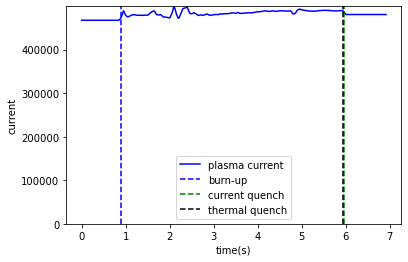

In [12]:
import matplotlib.pyplot as plt

plt.plot(t, ip, 'b', label = 'plasma current')
plt.axvline(x = tftsrt, ymin = 0,  color = "blue", linestyle = "dashed", label = "burn-up")
plt.axvline(x = tipminf, ymin = 0, color = "green", linestyle = "dashed", label = "current quench")
plt.axvline(x = tTQend, ymin = 0, color = "black", linestyle = "dashed", label = "thermal quench")
plt.xlabel('time(s)')
plt.ylabel('current')
plt.ylim([0, max(ip)])
plt.legend()
plt.show()

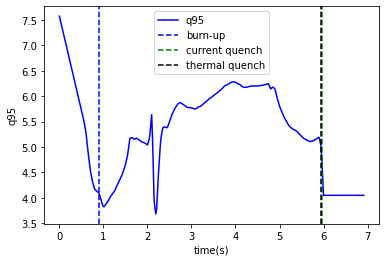

In [14]:
import matplotlib.pyplot as plt

plt.plot(t[0:], q95[0:], 'b', label = 'q95')
plt.axvline(x = tftsrt, ymin = 0,  color = "blue", linestyle = "dashed", label = "burn-up")
plt.axvline(x = tipminf, ymin = 0, color = "green", linestyle = "dashed", label = "current quench")
plt.axvline(x = tTQend, ymin = 0, color = "black", linestyle = "dashed", label = "thermal quench")
plt.xlabel('time(s)')
plt.ylabel('q95')
plt.legend()
plt.show()

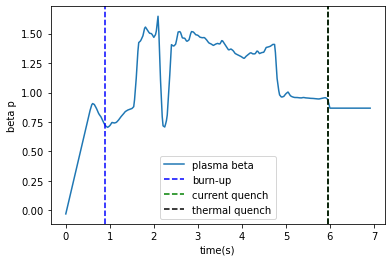

In [15]:
import matplotlib.pyplot as plt

plt.plot(t, betap, label = 'plasma beta')
plt.axvline(x = tftsrt, ymin = 0,  color = "blue", linestyle = "dashed", label = "burn-up")
plt.axvline(x = tipminf, ymin = 0, color = "green", linestyle = "dashed", label = "current quench")
plt.axvline(x = tTQend, ymin = 0, color = "black", linestyle = "dashed", label = "thermal quench")
plt.xlabel('time(s)')
plt.ylabel('beta p')
plt.legend()
plt.show()

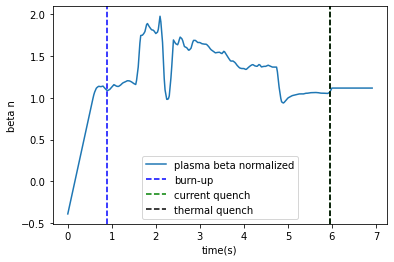

In [16]:
plt.plot(t, betan, label = 'plasma beta normalized')
plt.axvline(x = tftsrt, ymin = 0,  color = "blue", linestyle = "dashed", label = "burn-up")
plt.axvline(x = tipminf, ymin = 0, color = "green", linestyle = "dashed", label = "current quench")
plt.axvline(x = tTQend, ymin = 0, color = "black", linestyle = "dashed", label = "thermal quench")
plt.xlabel('time(s)')
plt.ylabel('beta n')
plt.legend()
plt.show()

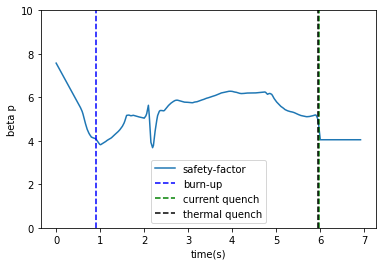

In [17]:
plt.plot(t, q95, label = 'safety-factor')
plt.axvline(x = tftsrt, ymin = 0,  color = "blue", linestyle = "dashed", label = "burn-up")
plt.axvline(x = tipminf, ymin = 0, color = "green", linestyle = "dashed", label = "current quench")
plt.axvline(x = tTQend, ymin = 0, color = "black", linestyle = "dashed", label = "thermal quench")
plt.xlabel('time(s)')
plt.ylabel('beta p')
plt.ylim([0,10])
plt.legend()
plt.show()

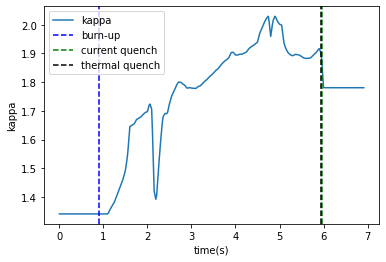

In [18]:
plt.plot(t, kappa, label = 'kappa')
plt.axvline(x = tftsrt, ymin = 0,  color = "blue", linestyle = "dashed", label = "burn-up")
plt.axvline(x = tipminf, ymin = 0, color = "green", linestyle = "dashed", label = "current quench")
plt.axvline(x = tTQend, ymin = 0, color = "black", linestyle = "dashed", label = "thermal quench")
plt.xlabel('time(s)')
plt.ylabel('kappa')
plt.legend()
plt.show()

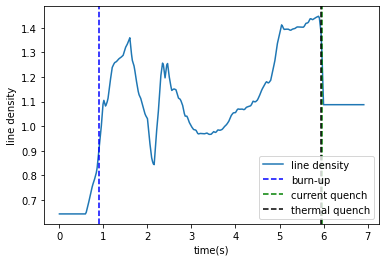

In [19]:
plt.plot(t, li, label = 'line density')
plt.axvline(x = tftsrt, ymin = 0,  color = "blue", linestyle = "dashed", label = "burn-up")
plt.axvline(x = tipminf, ymin = 0, color = "green", linestyle = "dashed", label = "current quench")
plt.axvline(x = tTQend, ymin = 0, color = "black", linestyle = "dashed", label = "thermal quench")
plt.xlabel('time(s)')
plt.ylabel('line density')
plt.legend()
plt.show()

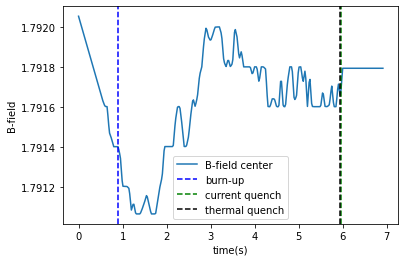

In [22]:
plt.plot(t, -Bc, label = 'B-field center')
plt.axvline(x = tftsrt, ymin = 0,  color = "blue", linestyle = "dashed", label = "burn-up")
plt.axvline(x = tipminf, ymin = 0, color = "green", linestyle = "dashed", label = "current quench")
plt.axvline(x = tTQend, ymin = 0, color = "black", linestyle = "dashed", label = "thermal quench")
plt.xlabel('time(s)')
plt.ylabel('B-field')
plt.legend()
plt.show()

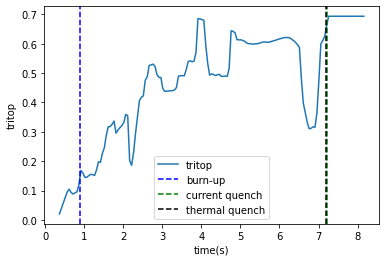

In [18]:
plt.plot(t, tritop, label = 'tritop')
plt.axvline(x = tftsrt, ymin = 0,  color = "blue", linestyle = "dashed", label = "burn-up")
plt.axvline(x = tipminf, ymin = 0, color = "green", linestyle = "dashed", label = "current quench")
plt.axvline(x = tTQend, ymin = 0, color = "black", linestyle = "dashed", label = "thermal quench")
plt.xlabel('time(s)')
plt.ylabel('tritop')
plt.legend()
plt.show()

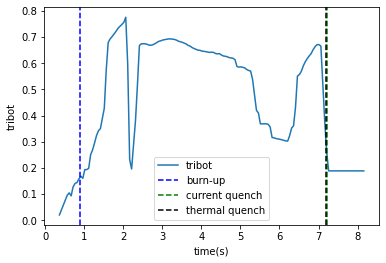

In [19]:
plt.plot(t, tribot, label = 'tribot')
plt.axvline(x = tftsrt, ymin = 0,  color = "blue", linestyle = "dashed", label = "burn-up")
plt.axvline(x = tipminf, ymin = 0, color = "green", linestyle = "dashed", label = "current quench")
plt.axvline(x = tTQend, ymin = 0, color = "black", linestyle = "dashed", label = "thermal quench")
plt.xlabel('time(s)')
plt.ylabel('tribot')
plt.legend()
plt.show()

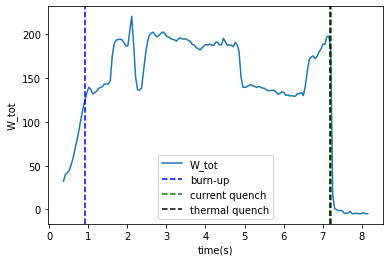

In [20]:
plt.plot(t, W_tot, label = 'W_tot')
plt.axvline(x = tftsrt, ymin = 0,  color = "blue", linestyle = "dashed", label = "burn-up")
plt.axvline(x = tipminf, ymin = 0, color = "green", linestyle = "dashed", label = "current quench")
plt.axvline(x = tTQend, ymin = 0, color = "black", linestyle = "dashed", label = "thermal quench")
plt.xlabel('time(s)')
plt.ylabel('W_tot')
plt.legend()
plt.show()

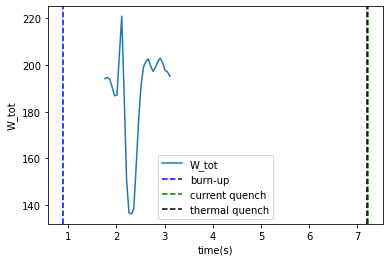

In [21]:
plt.plot(t[28:56], W_tot[28:56], label = 'W_tot')
plt.axvline(x = tftsrt, ymin = 0,  color = "blue", linestyle = "dashed", label = "burn-up")
plt.axvline(x = tipminf, ymin = 0, color = "green", linestyle = "dashed", label = "current quench")
plt.axvline(x = tTQend, ymin = 0, color = "black", linestyle = "dashed", label = "thermal quench")
plt.xlabel('time(s)')
plt.ylabel('W_tot')
plt.legend()
plt.show()

In [22]:
ts_te_core_cols = df_shot.columns.tolist()[18:32]
ts_te_edge_cols = df_shot.columns.tolist()[32:44]
ts_ne_core_cols = df_shot.columns.tolist()[44:58]
ts_ne_edge_cols = df_shot.columns.tolist()[58:68]

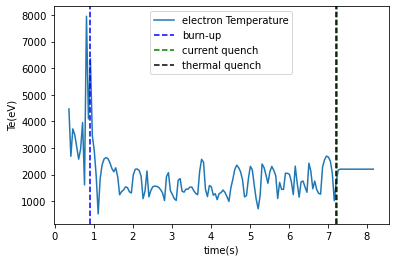

In [23]:
te_core = df_shot[ts_te_core_cols[-1]]
plt.plot(t, te_core, label = 'electron Temperature')
plt.axvline(x = tftsrt, ymin = 0,  color = "blue", linestyle = "dashed", label = "burn-up")
plt.axvline(x = tipminf, ymin = 0, color = "green", linestyle = "dashed", label = "current quench")
plt.axvline(x = tTQend, ymin = 0, color = "black", linestyle = "dashed", label = "thermal quench")
plt.xlabel('time(s)')
plt.ylabel('Te(eV)')
plt.legend()
plt.show()

In [26]:
import numpy as np
import torch
import torch.nn as nn

df = pd.read_csv("./dataset/KSTAR_Disruption_ts_data_extend.csv").reset_index()

# nan interpolation
df.interpolate(method = 'linear', limit_direction = 'forward')

# columns for use
ts_cols = [
    '\\q95', '\\ipmhd', '\\kappa', 
    '\\tritop', '\\tribot','\\betap','\\betan',
    '\\li', '\\WTOT_DLM03'
]

# float type
for col in ts_cols:
    df[col] = df[col].astype(np.float32)

# train / valid / test data split
from sklearn.model_selection import train_test_split
shot_list = np.unique(df.shot.values)

shot_train, shot_test = train_test_split(shot_list, test_size = 0.2, random_state = 42)
shot_train, shot_valid = train_test_split(shot_train, test_size = 0.2, random_state = 42)

df_train = pd.DataFrame()
df_valid = pd.DataFrame()
df_test = pd.DataFrame()

for shot in shot_train:
    df_train = pd.concat([df_train, df[df.shot == shot]], axis = 0)

for shot in shot_valid:
    df_valid = pd.concat([df_valid, df[df.shot == shot]], axis = 0)

for shot in shot_test:
    df_test = pd.concat([df_test, df[df.shot == shot]], axis = 0)

from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
scaler = RobustScaler()
df_train[ts_cols] = scaler.fit_transform(df_train[ts_cols].values)
df_valid[ts_cols] = scaler.transform(df_valid[ts_cols].values)
df_test[ts_cols] = scaler.transform(df_test[ts_cols].values)

# disruption info
# kstar_shot_list = pd.read_csv('./dataset/KSTAR_Disruption_Shot_List_extend.csv', encoding = "euc-kr")
kstar_shot_list = pd.read_csv('./dataset/KSTAR_Disruption_Shot_List.csv', encoding = "euc-kr")


# shot list
shot_list = np.unique(df.shot.values).tolist()

from typing import Optional, List
from tqdm.auto import tqdm

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, ts_data : pd.DataFrame, disrupt_data : pd.DataFrame, seq_len : int, cols : List, dist:int, dt : float):
        self.ts_data = ts_data
        self.disrupt_data = disrupt_data
        self.seq_len = seq_len
        self.dt = dt
        self.cols = cols
        self.dist = dist # distance

        self.indices = []
        self.labels = []
        self.n_classes = 2
        self._generate_index()

    def _generate_index(self):
        shot_list = np.unique(self.ts_data.shot.values).tolist()
        df_disruption = self.disrupt_data

        for shot in tqdm(shot_list):
            tTQend = df_disruption[df_disruption.shot == shot].tTQend.values[0]
            tftsrt = df_disruption[df_disruption.shot == shot].tftsrt.values[0]
            tipminf = df_disruption[df_disruption.shot == shot].tipminf.values[0]

            t_disrupt = tipminf

            df_shot = self.ts_data[self.ts_data.shot == shot]
            indices = []
            labels = []

            idx = int(tftsrt * self.dt)
            idx_last = len(df_shot.index) - self.seq_len - self.dist

            while(idx < idx_last):
                row = df_shot.iloc[idx]
                t = row['time']

                if idx_last - idx - self.seq_len - self.dist < 0:
                    break

                if t >= tftsrt and t < t_disrupt - self.dt * (self.seq_len + self.dist):
                    indx = df_shot.index.values[idx]
                    indices.append(indx)
                    labels.append(0)
                    idx += self.seq_len

                elif t > t_disrupt - self.dt * (self.seq_len + self.dist) and t <= t_disrupt:
                    indx = df_shot.index.values[idx]
                    indices.append(indx)
                    labels.append(1)
                    idx += self.seq_len
                
                elif t < tftsrt:
                    idx += self.seq_len
                
                elif t > t_disrupt:
                    break

            self.indices.extend(indices)
            self.labels.extend(labels)

    def __getitem__(self, idx:int):
        indx = self.indices[idx]
        label = self.labels[idx]
        label = np.array(label)
        label = torch.from_numpy(label)
        data = self.ts_data[self.cols].loc[indx:indx+self.seq_len - 1].values
        data = torch.from_numpy(data).float()
        return data, label

    def __len__(self):
        return len(self.indices)

    def get_num_per_cls(self):
        classes = np.unique(self.labels)
        self.num_per_cls_dict = dict()

        for cls in classes:
            num = np.sum(np.where(self.labels == cls, 1, 0))
            self.num_per_cls_dict[cls] = num
         
    def get_cls_num_list(self):
        cls_num_list = []
        for i in range(self.n_classes):
            cls_num_list.append(self.num_per_cls_dict[i])
        return cls_num_list

from sklearn.model_selection import train_test_split
ts_train = df_train
ts_valid = df_valid
ts_test = df_test
seq_len = 21
cols = ts_cols

train_data = CustomDataset(ts_train, kstar_shot_list, seq_len = seq_len, cols = ts_cols, dist = 0, dt = 1.0 / 210 * 4)
valid_data = CustomDataset(ts_valid, kstar_shot_list, seq_len = seq_len, cols = ts_cols, dist = 0, dt = 1.0 / 210 * 4)
test_data = CustomDataset(ts_test, kstar_shot_list, seq_len = seq_len, cols = ts_cols, dist = 0, dt = 1.0 / 210 * 4)

from torch.utils.data import DataLoader
from src.utils.sampler import ImbalancedDatasetSampler

batch_size = 128
sampler = ImbalancedDatasetSampler(train_data)
train_loader = DataLoader(train_data, batch_size = batch_size, num_workers = 4, sampler = sampler)
valid_loader = DataLoader(valid_data, batch_size = batch_size, num_workers = 4, shuffle = True)
test_loader = DataLoader(test_data, batch_size = batch_size, num_workers = 4, shuffle = True)

sample_data, sample_target = next(iter(train_loader))
print("sample_data : ", sample_data.size())
print("sample_target : ", sample_target.size())

 76%|███████▋  | 148/194 [01:12<00:22,  2.05it/s] 


KeyboardInterrupt: 

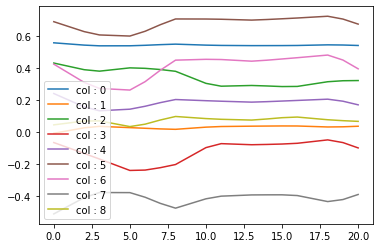

In [168]:
import matplotlib.pyplot as plt
plt.plot(sample_data[0,:,0].numpy(), label = 'col : 0')
plt.plot(sample_data[0,:,1].numpy(), label = 'col : 1')
plt.plot(sample_data[0,:,2].numpy(), label = 'col : 2')
plt.plot(sample_data[0,:,3].numpy(), label = 'col : 3')
plt.plot(sample_data[0,:,4].numpy(), label = 'col : 4')
plt.plot(sample_data[0,:,5].numpy(), label = 'col : 5')
plt.plot(sample_data[0,:,6].numpy(), label = 'col : 6')
plt.plot(sample_data[0,:,7].numpy(), label = 'col : 7')
plt.plot(sample_data[0,:,8].numpy(), label = 'col : 8')
plt.legend()
plt.show()

disruptive :  51
non-disruptive :  1345


/home/jinsukim/miniconda3/envs/research-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


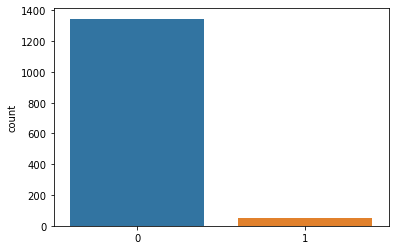

In [128]:
import seaborn as sns
sns.countplot(train_data.labels)
print("disruptive : ", np.sum(train_data.labels))
print("non-disruptive : ", len(train_data.labels) - np.sum(train_data.labels))

In [170]:
import torch
import torch.nn as nn
import numpy as np
from torch.autograd import Variable
from torch.nn import functional as F
from typing import List, Optional, Union, Tuple

class ConvLSTM(nn.Module):
    def __init__(
        self, 
        seq_len : int = 21, 
        col_dim : int = 10, 
        conv_dim : int = 32, 
        conv_kernel : int = 3,
        conv_stride : int = 1, 
        conv_padding : int = 1,
        lstm_dim : int = 64, 
        n_classes : int = 2, 
        mlp_dim : int = 64,
        ):
        
        super(ConvLSTM, self).__init__()
        self.col_dim = col_dim
        self.seq_len = seq_len
        self.lstm_dim = lstm_dim

        # spatio-conv encoder : analyze spatio-effect between variables
        self.conv = nn.Sequential(
            nn.Conv1d(in_channels = col_dim, out_channels = conv_dim, kernel_size = conv_kernel, stride = conv_stride, padding = conv_padding),
            nn.BatchNorm1d(conv_dim), 
            nn.ReLU(),
            nn.Conv1d(in_channels = conv_dim, out_channels = conv_dim, kernel_size = conv_kernel, stride = conv_stride, padding = conv_padding),
            nn.BatchNorm1d(conv_dim), 
            nn.ReLU(),
        )

        lstm_input_dim = self.compute_conv1d_output_dim(self.compute_conv1d_output_dim(seq_len, conv_kernel, conv_stride, conv_padding, 1), conv_kernel, conv_stride, conv_padding, 1)

        # temporl - lstm
        self.lstm = nn.LSTM(lstm_input_dim, lstm_dim, bidirectional = True, batch_first = False)
        self.w_s1 = nn.Linear(lstm_dim * 2, lstm_dim)
        self.w_s2 = nn.Linear(lstm_dim, lstm_dim)

        self.classifier = nn.Sequential(
            nn.Linear(lstm_dim * 2, mlp_dim),
            nn.BatchNorm1d(mlp_dim),
            nn.ReLU(),
            nn.Linear(mlp_dim, mlp_dim),
            nn.BatchNorm1d(mlp_dim),
            nn.ReLU(),
            nn.Linear(mlp_dim, n_classes)
        )
    
    def compute_conv1d_output_dim(self, input_dim : int, kernel_size : int = 3, stride : int = 1, padding : int = 1, dilation : int = 1):
        return int((input_dim + 2 * padding - dilation * (kernel_size - 1) - 1) / stride + 1)

    def attention(self, lstm_output : torch.Tensor)->torch.Tensor:
        attn_weight_matrix = self.w_s2(torch.tanh(self.w_s1(lstm_output)))
        attn_weight_matrix = F.softmax(attn_weight_matrix, dim = 2)
        return attn_weight_matrix

    def forward(self, x : torch.Tensor)->torch.Tensor:
        # x : (batch, seq_len, col_dim)
        x_conv = self.conv(x.permute(0,2,1))
        h_0 = Variable(torch.zeros(2, x.size()[0], self.lstm_dim)).to(x.device)
        c_0 = Variable(torch.zeros(2, x.size()[0], self.lstm_dim)).to(x.device)

        lstm_output, (h_n,c_n) = self.lstm(x_conv.permute(1,0,2), (h_0, c_0))
        lstm_output = lstm_output.permute(1,0,2)
        att = self.attention(lstm_output)
        hidden = torch.bmm(att.permute(0,2,1), lstm_output).mean(dim = 1)
        hidden = hidden.view(hidden.size()[0], -1)
        output = self.classifier(hidden)
        return output

seq_len = seq_len
col_len = len(cols)
batch_size = batch_size
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = ConvLSTM(
    seq_len = seq_len,
    col_dim = col_len,
)

import torch
import torch.nn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score

def train_per_epoch(
    data_loader : torch.utils.data.DataLoader,
    model : torch.nn.Module,
    optimizer : torch.optim.Optimizer,
    scheduler : Optional[torch.optim.lr_scheduler._LRScheduler],
    loss_fn : torch.nn.Module,
    device : str = "cpu",
    max_norm_grad : Optional[float] = None
    ):

    model.train()
    model.to(device)

    train_loss = 0
    train_acc = 0

    total_pred = np.array([])
    total_label = np.array([])

    for batch_idx, (data, target) in enumerate(data_loader):
        optimizer.zero_grad()
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()

        # use gradient clipping
        if max_norm_grad:
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm_grad)

        optimizer.step()

        train_loss += loss.item()

        pred = torch.nn.functional.softmax(output, dim = 1).max(1, keepdim = True)[1]
        train_acc += pred.eq(target.view_as(pred)).sum().item() / data.size(0) 
    
        total_pred = np.concatenate((total_pred, pred.cpu().numpy().reshape(-1,)))
        total_label = np.concatenate((total_label, target.cpu().numpy().reshape(-1,)))
        
    if scheduler:
        scheduler.step()

    train_loss /= (batch_idx + 1)
    train_acc /= (batch_idx + 1)

    train_f1 = f1_score(total_label, total_pred, average = "macro")

    return train_loss, train_acc, train_f1

def valid_per_epoch(
    data_loader : torch.utils.data.DataLoader,
    model : torch.nn.Module,
    optimizer : torch.optim.Optimizer,
    loss_fn : torch.nn.Module,
    device : str = "cpu",
    ):

    model.eval()
    model.to(device)

    valid_loss = 0
    valid_acc = 0

    total_pred = np.array([])
    total_label = np.array([])

    for batch_idx, (data, target) in enumerate(data_loader):
        with torch.no_grad():
            optimizer.zero_grad()
            data = data.to(device)
            target = target.to(device)
            output = model(data)
            loss = loss_fn(output, target)
            valid_loss += loss.item()

            pred = torch.nn.functional.softmax(output, dim = 1).max(1, keepdim = True)[1]
            valid_acc += pred.eq(target.view_as(pred)).sum().item() / data.size(0) 
        
            total_pred = np.concatenate((total_pred, pred.cpu().numpy().reshape(-1,)))
            total_label = np.concatenate((total_label, target.cpu().numpy().reshape(-1,)))

    valid_loss /= (batch_idx + 1)
    valid_acc /= (batch_idx + 1)

    valid_f1 = f1_score(total_label, total_pred, average = "macro")

    return valid_loss, valid_acc, valid_f1


def train(
    train_loader : torch.utils.data.DataLoader, 
    valid_loader : Optional[torch.utils.data.DataLoader],
    model : torch.nn.Module,
    optimizer : torch.optim.Optimizer,
    scheduler : Optional[torch.optim.lr_scheduler._LRScheduler],
    loss_fn = None,
    device : str = "cpu",
    num_epoch : int = 64,
    verbose : Optional[int] = 8,
    save_best_dir : str = "./weights/best.pt",
    save_last_dir : str = "./weights/last.pt",
    max_norm_grad : Optional[float] = None,
    criteria : str = "f1_score"
    ):

    train_loss_list = []
    valid_loss_list = []
    
    train_acc_list = []
    valid_acc_list = []

    train_f1_list = []
    valid_f1_list = []

    best_acc = 0
    best_epoch = 0
    best_f1 = 0
    best_loss = torch.inf

    if loss_fn is None:
        loss_fn = torch.nn.CrossEntropyLoss(reduction = 'mean')

    for epoch in tqdm(range(num_epoch), desc = "training process"):

        # training
        train_loss, train_acc, train_f1 = train_per_epoch(
            train_loader, 
            model,
            optimizer,
            scheduler,
            loss_fn,
            device,
            max_norm_grad
        )

        train_loss_list.append(train_loss)
        train_acc_list.append(train_acc)
        train_f1_list.append(train_f1)

        # validation
        valid_loss, valid_acc, valid_f1 = valid_per_epoch(
            valid_loader, 
            model,
            optimizer,
            loss_fn,
            device 
        )
        
        valid_loss_list.append(valid_loss)
        valid_acc_list.append(valid_acc)
        valid_f1_list.append(valid_f1)

        if verbose:
            if epoch % verbose == 0:
                print("epoch : {}, train loss : {:.3f}, valid loss : {:.3f}, train acc : {:.3f}, valid acc : {:.3f}, train f1 : {:.3f}, valid f1 : {:.3f}".format(
                    epoch+1, train_loss, valid_loss, train_acc, valid_acc, train_f1, valid_f1
                ))

        # save the best parameters
        if criteria == "acc" and best_acc < valid_acc:
            best_acc = valid_acc
            best_f1 = valid_f1
            best_loss = valid_loss
            best_epoch  = epoch
            torch.save(model.state_dict(), save_best_dir)

        elif criteria == "f1_score" and best_f1 < valid_f1:
            best_acc = valid_acc
            best_f1 = valid_f1
            best_loss = valid_loss
            best_epoch  = epoch
            torch.save(model.state_dict(), save_best_dir)

        elif criteria == "loss" and best_loss > valid_loss:
            best_acc = valid_acc
            best_f1 = valid_f1
            best_loss = valid_loss
            best_epoch  = epoch
            torch.save(model.state_dict(), save_best_dir)

        # save the last parameters
        torch.save(model.state_dict(), save_last_dir)

    print("training process finished, best loss : {:.3f} and best acc : {:.3f}, best f1 : {:.3f}, best epoch : {}".format(
        best_loss, best_acc, best_f1, best_epoch
    ))

    return  train_loss_list, train_acc_list, train_f1_list,  valid_loss_list,  valid_acc_list, valid_f1_list


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
lr = 1e-3

from src.loss import FocalLoss
train_data.get_num_per_cls()
cls_num_list = train_data.get_cls_num_list()
per_cls_weights = 1.0 / np.array(cls_num_list)
per_cls_weights = per_cls_weights / np.sum(per_cls_weights)
per_cls_weights = torch.FloatTensor(per_cls_weights)
loss_fn = FocalLoss(per_cls_weights, gamma = 2)

num_epoch = 64
verbose = 8
save_best_dir = "./weights/ts_conv_lstm_best.pt"
save_last_dir = "./weights/ts_conv_lstm_last.pt"
max_norm_grad = 1.0
criteria = "f1_score"
optimizer = torch.optim.AdamW(model.parameters(), lr = lr)

model.to(device)

train_loss, train_acc, train_f1, valid_loss, valid_acc, valid_f1 = train(
    train_loader,
    valid_loader,
    model,
    optimizer,
    None,
    loss_fn,
    device,
    num_epoch,
    verbose,
    save_best_dir,
    save_last_dir,
    max_norm_grad,
    criteria
)

training process:   2%|▏         | 1/64 [00:01<01:44,  1.66s/it]

epoch : 1, train loss : 4.496, valid loss : 1.151, train acc : 0.856, valid acc : 0.025, train f1 : 0.856, valid f1 : 0.032


training process:  14%|█▍        | 9/64 [00:13<01:25,  1.55s/it]

epoch : 9, train loss : 0.007, valid loss : 1.017, train acc : 1.000, valid acc : 0.859, train f1 : 1.000, valid f1 : 0.564


training process:  27%|██▋       | 17/64 [00:26<01:12,  1.55s/it]

epoch : 17, train loss : 0.002, valid loss : 1.140, train acc : 1.000, valid acc : 0.994, train f1 : 1.000, valid f1 : 0.933


training process:  39%|███▉      | 25/64 [00:38<01:00,  1.54s/it]

epoch : 25, train loss : 0.001, valid loss : 2.109, train acc : 0.999, valid acc : 0.990, train f1 : 0.999, valid f1 : 0.878


training process:  52%|█████▏    | 33/64 [00:50<00:46,  1.50s/it]

epoch : 33, train loss : 0.011, valid loss : 0.940, train acc : 0.997, valid acc : 0.990, train f1 : 0.997, valid f1 : 0.897


training process:  64%|██████▍   | 41/64 [01:02<00:35,  1.54s/it]

epoch : 41, train loss : 0.000, valid loss : 1.221, train acc : 1.000, valid acc : 0.994, train f1 : 1.000, valid f1 : 0.933


training process:  77%|███████▋  | 49/64 [01:14<00:22,  1.52s/it]

epoch : 49, train loss : 0.000, valid loss : 1.144, train acc : 1.000, valid acc : 0.892, train f1 : 1.000, valid f1 : 0.881


training process:  89%|████████▉ | 57/64 [01:27<00:10,  1.48s/it]

epoch : 57, train loss : 0.000, valid loss : 0.625, train acc : 1.000, valid acc : 0.994, train f1 : 1.000, valid f1 : 0.942


training process: 100%|██████████| 64/64 [01:38<00:00,  1.53s/it]

training process finished, best loss : 0.801 and best acc : 0.998, best f1 : 0.979, best epoch : 60


In [2]:
import torch
import os
import numpy as np
import pandas as pd
import argparse
from src.CustomDataset import DatasetFor0D
from torch.utils.data import DataLoader
from src.utils.sampler import ImbalancedDatasetSampler
from src.utils.utility import preparing_0D_dataset, plot_learning_curve, generate_prob_curve_from_0D
from src.visualization.visualize_latent_space import visualize_2D_latent_space, visualize_3D_latent_space
from src.visualization.visualize_application import generate_real_time_experiment_0D
from src.train import train, train_DRW
from src.evaluate import evaluate
from src.loss import FocalLoss, LDAMLoss
from src.models.ts_transformer import TStransformer
from src.feature_importance import compute_permute_feature_importance

ts_cols = [
    '\\q95', '\\ipmhd', '\\kappa', '\\tritop', '\\tribot',
    '\\betap','\\betan','\\li', '\\WTOT_DLM03','\\ne_inter01', 
    '\\TS_NE_CORE_AVG', '\\TS_NE_EDGE_AVG', '\\TS_TE_CORE_AVG','\\TS_TE_EDGE_AVG'
]

# torch device state
print("############### device setup ###################")
print("torch device avaliable : ", torch.cuda.is_available())
print("torch current device : ", torch.cuda.current_device())
print("torch device num : ", torch.cuda.device_count())

# torch cuda initialize and clear cache
torch.cuda.init()
torch.cuda.empty_cache()



gpu_num = 1
tag = "{}_clip_{}_dist_{}".format("Transformer", 21, 3)
save_best_dir = "./weights/{}_best.pt".format(tag)

# device allocation
if(torch.cuda.device_count() >= 1):
    device = "cuda:" + str(gpu_num)
else:
    device = 'cpu'
    
# dataset setup
ts_train, ts_valid, ts_test, ts_scaler = preparing_0D_dataset("./dataset/KSTAR_Disruption_ts_data_extend.csv", ts_cols = ts_cols, scaler = 'Robust')
kstar_shot_list = pd.read_csv('./dataset/KSTAR_Disruption_Shot_List.csv', encoding = "euc-kr")

test_data = DatasetFor0D(ts_test, kstar_shot_list, seq_len = 21, cols = ts_cols, dist = 3, dt = 4 * 1 / 210, scaler = ts_scaler)

# define model
model = TStransformer(
    n_features=len(ts_cols),
    feature_dims = 128,
    max_len = 21,
    n_layers = 8,
    n_heads = 8,
    dim_feedforward=512,
    dropout = 0.25,
    cls_dims = 128,
    n_classes = 2
)

print("\n################# model summary #################\n")
model.summary()
model.to(device)

test_sampler = None
test_loader = DataLoader(test_data, batch_size = 128, sampler=test_sampler, num_workers = 4, pin_memory=False)

sample_data, sample_target = next(iter(test_loader))
model.load_state_dict(torch.load(save_best_dir))

############### device setup ###################
torch device avaliable :  True
torch current device :  0
torch device num :  4


100%|██████████| 183/183 [00:01<00:00, 120.57it/s]



################# model summary #################

-----------------------------------------------------------------------------------
           Layer (type)                Input Shape         Param #     Tr. Param #
           NoiseLayer-1                [2, 21, 14]               0               0
               Linear-2                [2, 21, 14]           1,920           1,920
   PositionalEncoding-3               [21, 2, 128]               0               0
   TransformerEncoder-4     [21, 2, 128], [21, 21]       1,586,176       1,586,176
               Linear-5                   [2, 128]          16,512          16,512
          BatchNorm1d-6                   [2, 128]             256             256
                 GELU-7                   [2, 128]               0               0
               Linear-8                   [2, 128]             258             258
Total params: 1,605,122
Trainable params: 1,605,122
Non-trainable params: 0
Batch size: 2
---------------------------

<All keys matched successfully>

In [53]:
model.load_state_dict(torch.load(save_best_dir))
sample_output = model(sample_data.to(device))

In [54]:
sample_pred = torch.nn.functional.softmax(sample_output, dim = 1)[:,0]

In [55]:
print(sample_pred[0])
print(sample_target[0])

tensor(0.0333, device='cuda:1', grad_fn=<SelectBackward0>)
tensor(1)


In [56]:
torch.nn.functional.softmax(sample_output, dim = 1)

tensor([[3.3330e-02, 9.6667e-01],
        [2.7145e-01, 7.2855e-01],
        [3.0580e-01, 6.9420e-01],
        [1.4346e-01, 8.5654e-01],
        [2.8615e-01, 7.1385e-01],
        [4.2439e-01, 5.7561e-01],
        [1.9263e-01, 8.0737e-01],
        [1.6274e-01, 8.3726e-01],
        [3.7575e-01, 6.2425e-01],
        [3.2592e-01, 6.7408e-01],
        [7.5751e-01, 2.4249e-01],
        [2.9122e-01, 7.0878e-01],
        [9.8088e-01, 1.9118e-02],
        [2.3990e-01, 7.6010e-01],
        [9.7677e-01, 2.3230e-02],
        [4.2855e-01, 5.7145e-01],
        [2.3695e-01, 7.6305e-01],
        [3.0075e-02, 9.6993e-01],
        [3.8017e-02, 9.6198e-01],
        [6.2215e-01, 3.7785e-01],
        [2.4097e-01, 7.5903e-01],
        [4.7639e-01, 5.2361e-01],
        [7.8935e-01, 2.1065e-01],
        [8.2676e-01, 1.7324e-01],
        [1.5340e-01, 8.4660e-01],
        [7.1431e-01, 2.8569e-01],
        [9.0829e-01, 9.1709e-02],
        [6.1467e-01, 3.8533e-01],
        [7.9586e-02, 9.2041e-01],
        [1.042

In [57]:
threshold = 0.5
sample_pred = torch.logical_not((sample_pred > torch.FloatTensor([threshold]).to(device)))

In [58]:
sample_acc = sample_pred.eq(sample_target.to(device).view_as(sample_pred)).sum().item()

In [59]:
sample_pred.size()

torch.Size([128])

In [60]:
sample_pred

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
        False,  True, False,  True, False,  True,  True,  True,  True, False,
         True,  True, False, False,  True, False, False, False,  True,  True,
         True,  True,  True, False, False, False, False, False,  True,  True,
         True,  True,  True,  True, False,  True, False, False, False,  True,
         True,  True,  True,  True,  True, False,  True, False,  True, False,
        False,  True,  True,  True,  True,  True, False, False, False, False,
        False, False,  True,  True,  True, False,  True,  True, False,  True,
        False,  True,  True, False, False, False, False, False, False,  True,
         True,  True,  True,  True, False,  True,  True,  True, False,  True,
         True,  True,  True,  True, False,  True, False, False,  True, False,
        False, False, False, False, False, False, False, False, False, False,
         True, False, False,  True,  True, False, False, False],

In [61]:
sample_output = model(sample_data.to(device))
sample_pred = torch.nn.functional.softmax(sample_output, dim = 1)[:,0]
sample_pred = torch.logical_not((sample_pred > torch.FloatTensor([threshold]).to(device)))
sample_pred2 = torch.nn.functional.softmax(sample_output, dim = 1).max(1, keepdim = True)[1]

In [62]:
sample_pred.eq(sample_pred2.view_as(sample_pred))

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True], device='cuda:1')

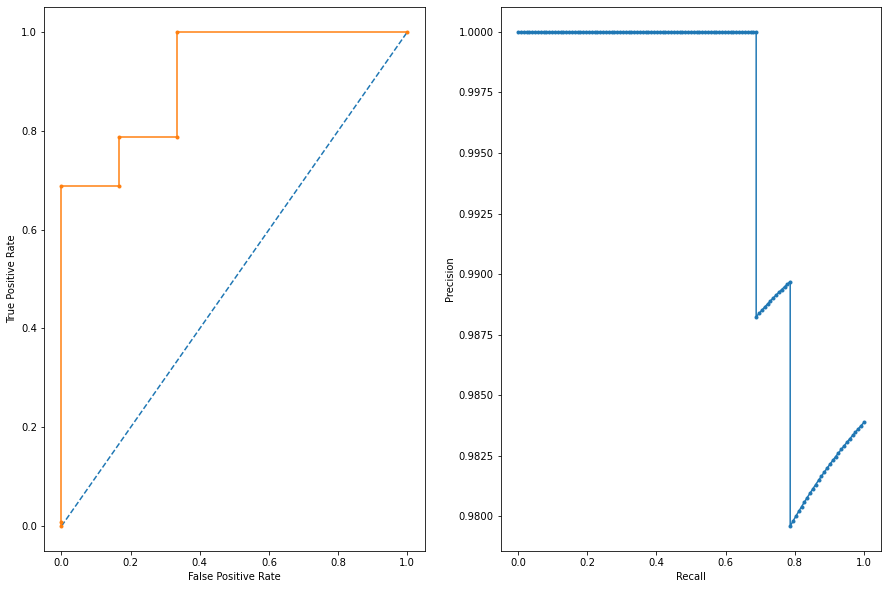

In [71]:
sample_output = model(sample_data.to(device))
sample_pred = torch.nn.functional.softmax(sample_output, dim = 1)[:,1]

total_pred = sample_pred.detach().cpu().numpy()
total_label = sample_target.detach().cpu().numpy()

import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve

fig, axes = plt.subplots(1,2, sharex = False, figsize = (15, 10))

lr_probs = total_pred
total_pred = np.where(total_pred > threshold, 1, 0)

# roc score
ns_probs = [0 for _ in range(len(total_label))]

ns_fpr, ns_tpr, a = roc_curve(total_label, ns_probs)
lr_fpr, lr_tpr, b = roc_curve(total_label, lr_probs)

axes[0].plot(ns_fpr, ns_tpr, linestyle = '--', label = 'Random')
axes[0].plot(lr_fpr, lr_tpr, marker = '.', label = 'Model')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')

lr_precision, lr_recall, _ = precision_recall_curve(total_label, lr_probs)
axes[1].plot(lr_recall, lr_precision, marker = '.', label = 'Model')
axes[1].set_xlabel("Recall")
axes[1].set_ylabel("Precision")

plt.show()

In [72]:
sample_pred

tensor([8.7772e-01, 5.8286e-01, 6.2971e-01, 9.1316e-01, 7.0616e-01, 7.7307e-01,
        7.4006e-01, 7.9097e-01, 7.4741e-01, 6.7664e-01, 2.9829e-01, 6.8985e-01,
        3.9003e-02, 8.4328e-01, 3.2686e-02, 1.5748e-01, 7.0816e-01, 9.7341e-01,
        9.6672e-01, 5.4863e-01, 6.7438e-01, 5.8430e-01, 1.3438e-01, 3.5878e-02,
        7.9626e-01, 8.4950e-01, 3.2526e-01, 6.4353e-01, 9.1462e-01, 9.3614e-01,
        6.7378e-01, 6.3563e-01, 6.8179e-01, 2.9060e-01, 5.1740e-01, 6.4715e-01,
        2.6179e-01, 1.3643e-01, 6.9071e-01, 6.5775e-01, 6.3516e-01, 7.1003e-01,
        6.3132e-01, 8.8091e-01, 6.7657e-01, 8.7086e-01, 1.3271e-01, 6.4284e-02,
        3.4695e-01, 5.8573e-01, 7.0409e-01, 9.5499e-01, 6.8744e-01, 5.8339e-01,
        8.5768e-01, 5.1214e-01, 4.2498e-01, 2.8737e-01, 7.9002e-01, 6.0958e-01,
        4.7895e-01, 2.3352e-01, 6.5462e-01, 8.1675e-01, 7.5292e-01, 6.2392e-01,
        9.1192e-02, 4.8935e-01, 2.2695e-01, 9.9399e-02, 5.4663e-01, 1.7599e-01,
        1.2764e-01, 8.8821e-01, 9.5018e-

In [73]:
sample_target.to(device).eq((sample_pred > torch.FloatTensor([0.1]).to(device)))

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False,  True, False,  True,  True,  True,  True,  True,
         True,  True,  True, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True, False,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True, False,  True,  True, False,
         True,  True,  True,  True,  True, False,  True,  True, False,  True,
        False,  True,  True,  True,  True,  True,  True, False, False,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True, False,
        False, False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True],

Text(33.0, 0.5, 'Actual')

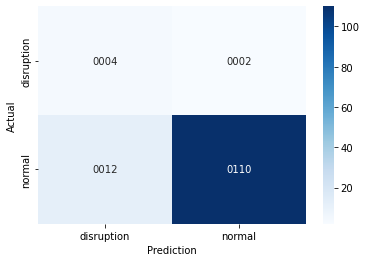

In [93]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
threshold = 0.9

total_pred = sample_pred.detach().cpu().numpy()
total_label = sample_target.detach().cpu().numpy()
total_pred = np.where(total_pred > 1 - threshold, 1, 0)

conf_mat = confusion_matrix(total_label, total_pred)
s = sns.heatmap(
    conf_mat, # conf_mat / np.sum(conf_mat),
    annot = True,
    fmt ='04d' ,# fmt = '.2f',
    cmap = 'Blues',
    xticklabels=["disruption","normal"],
    yticklabels=["disruption","normal"],
)

s.set_xlabel("Prediction")
s.set_ylabel("Actual")